# July 23, 2019 3min CNN for Grey Image
* name: Jikhan Jeong
* reference: https://github.com/jskDr/keraspp
* Too much time consuming so that it needs HPC or GCP (Taking 3 hours even in Grey Image)
* Next time, I will use Colab to use GPU. Then I will use HPC and GCP

----------------------------
* Using more layers than DNN as follows:
* Conv2D
* MaxPooling 2D
* Flatten : high dim to 1 dim
----------------------------
* CNN is different with DNN
* CNN do not make an 2D image as a 1D vector like DNN
* Grey Image needs to put 1 dim for channel 

In [1]:
import keras
from keras import models, layers
from keras import backend

Using TensorFlow backend.


# 1. CNN Model

In [13]:
class CNN(models.Sequential):
    def __init__(self, input_shape, num_classes):
        super().__init__() # super = paranet class = models.Sequential
        
        self.add(layers.Conv2D(32, kernel_size =(3, 3), activation ='relu', input_shape =input_shape))
        self.add(layers.Conv2D(64, kernel_size =(3, 3), activation ='relu'))
        self.add(layers.MaxPooling2D(pool_size=(2,2)))
        self.add(layers.Dropout(0.25))
        self.add(layers.Flatten())
        self.add(layers.Dense(128, activation='relu'))
        self.add(layers.Dropout(0.25))
        self.add(layers.Dense(num_classes, activation ='softmax'))

        self.compile(loss=keras.losses.categorical_crossentropy, optimizer ='rmsprop', metrics=['accuracy'])

# 2. Data

In [5]:
from keras import datasets

In [9]:
class DATA():
    def __init__(self):
        num_classes = 10
    
        (x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
    
        img_rows, img_cols = x_train.shape[1:]
    
        if backend.image_data_format() == 'channels_first':
            x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
            x_test =  x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
            input_shape = (1, img_row, img_cols)
        
        else:
            x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols,1)
            x_test =  x_test.reshape(x_test.shape[0], img_rows, img_cols,1)
            input_shape = (img_rows, img_cols,1)
        
            x_train = x_train.astype('float32')
            x_test  = x_test.astype('float32')
            x_train /= 255
            x_test  /= 255
    
            y_train = keras.utils.to_categorical(y_train, num_classes)
            y_test  = keras.utils.to_categorical(y_test, num_classes)
    
            self.input_shape = input_shape
            self.num_classes = num_classes
            self.x_train, self.y_train = x_train, y_train
            self.x_test, self.y_test   = x_test, y_test

# 3. Graph

In [10]:
import matplotlib.pyplot as plt

## Loss Graph

def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train','Test'], loc=0)

## ACC Graph
    
def plot_acc(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train','Test'], loc=0)

# 4. Main

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 905s 19ms/step - loss: 0.2045 - acc: 0.9371 - val_loss: 0.0651 - val_acc: 0.9800
Epoch 2/10
48000/48000 [==============================] - 901s 19ms/step - loss: 0.0689 - acc: 0.9783 - val_loss: 0.0494 - val_acc: 0.9855
Epoch 3/10
48000/48000 [==============================] - 940s 20ms/step - loss: 0.0505 - acc: 0.9849 - val_loss: 0.0508 - val_acc: 0.9862
Epoch 4/10
48000/48000 [==============================] - 852s 18ms/step - loss: 0.0428 - acc: 0.9870 - val_loss: 0.0554 - val_acc: 0.9845
Epoch 5/10
48000/48000 [==============================] - 854s 18ms/step - loss: 0.0371 - acc: 0.9882 - val_loss: 0.0465 - val_acc: 0.9872
Epoch 6/10
48000/48000 [==============================] - 853s 18ms/step - loss: 0.0350 - acc: 0.9890 - val_loss: 0.0500 - val_acc: 0.9872
Epoch 7/10
48000/48000 [==============================] - 934s 19ms/step - loss: 0.0337 - acc: 0.9893 - val_loss: 0.

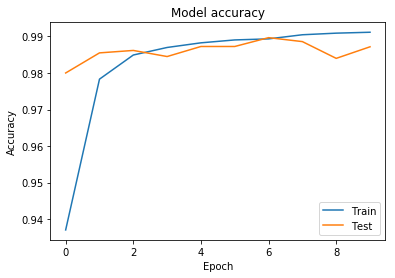

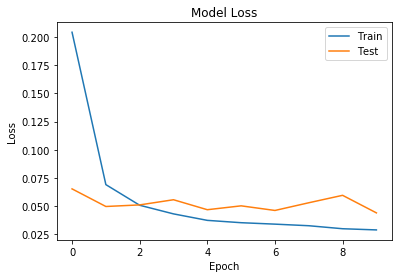

In [14]:
def main():
    
    # parameters
    
    batch_size = 128
    epochs = 10
    
    data = DATA()
    
    model = CNN(data.input_shape, data.num_classes)
    
    history = model.fit(data.x_train, data.y_train, batch_size = batch_size, epochs = epochs, validation_split= 0.2)
    
    score = model.evaluate(data.x_test, data.y_test)
    print()
    print('Test loss', score[0])
    print('Test ACC', score[1])
    
    plot_acc(history)
    plt.show()
    plot_loss(history)
    plt.show()
    
    
if __name__ == '__main__':
    main()